## Importing Libraries

In [1]:
import numpy as np  #NumPy is a general-purpose array-processing package. It provides a high-performance multidimensional array object, and tools for working with these arrays.
import pandas as pd  #pandas is a popular Python-based data analysis toolkit. It presents a diverse range of utilities, ranging from parsing multiple file formats to converting an entire data table into a NumPy matrix array.
import matplotlib.pyplot as plt  #matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.
import seaborn as sns  #Seaborn is a library in Python predominantly used for making statistical graphics. Seaborn is a data visualization library built on top of matplotlib and closely integrated with pandas data structures in Python. Visualization is the central part of Seaborn which helps in exploration and understanding of data.
import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [2]:
netflix_movies=pd.read_csv("/kaggle/input/netflix-movies-and-tv-irving/netflix_movies_detailed_up_to_2025.csv")
netflix_series=pd.read_csv("/kaggle/input/netflix-movies-and-tv-irving/netflix_tv_shows_detailed_up_to_2025.csv")
netflix_dataset = pd.concat([netflix_movies, netflix_series], ignore_index=True)
netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,NaN,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000.0,752600867.0
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,NaN,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000.0,839030630.0
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,NaN,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000.0,954305868.0
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,NaN,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000.0,592461732.0
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,NaN,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000.0,494879471.0


In [3]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       32000 non-null  int64  
 1   type          32000 non-null  object 
 2   title         32000 non-null  object 
 3   director      20903 non-null  object 
 4   cast          30639 non-null  object 
 5   country       29737 non-null  object 
 6   date_added    32000 non-null  object 
 7   release_year  32000 non-null  int64  
 8   rating        32000 non-null  float64
 9   duration      16000 non-null  object 
 10  genres        30919 non-null  object 
 11  language      32000 non-null  object 
 12  description   28662 non-null  object 
 13  popularity    32000 non-null  float64
 14  vote_count    32000 non-null  int64  
 15  vote_average  32000 non-null  float64
 16  budget        16000 non-null  float64
 17  revenue       16000 non-null  float64
dtypes: float64(5), int64(3), o

In [4]:
#Identify the unique values
dict = {}
for i in list(netflix_dataset.columns):
    dict[i] = netflix_dataset[i].value_counts().shape[0]
    
print(pd.DataFrame(dict,index = ["unique count"]).transpose())

              unique count
show_id              31594
type                     2
title                30639
director             13011
cast                 30230
country               1745
date_added            5504
release_year            16
rating                2728
duration                 1
genres                3895
language                83
description          28636
popularity           24159
vote_count            2902
vote_average          2728
budget                 958
revenue               5327


In [5]:
# Exploración de datos.
print("Tabla de valores nulos:")
print(netflix_dataset.isnull().sum())

Tabla de valores nulos:
show_id             0
type                0
title               0
director        11097
cast             1361
country          2263
date_added          0
release_year        0
rating              0
duration        16000
genres           1081
language            0
description      3338
popularity          0
vote_count          0
vote_average        0
budget          16000
revenue         16000
dtype: int64


show_id does represents the primary key of the datasets.
There are only two types of Netflix content type, where as others are distributed in wide range will need futher analysis with graphs.

In [6]:
# Missing values
print('Table of missing values: ')
print(netflix_dataset.isnull().sum())

Table of missing values: 
show_id             0
type                0
title               0
director        11097
cast             1361
country          2263
date_added          0
release_year        0
rating              0
duration        16000
genres           1081
language            0
description      3338
popularity          0
vote_count          0
vote_average        0
budget          16000
revenue         16000
dtype: int64


In [7]:
## Numero de series
netflix_dataset[netflix_dataset['type'] == 'TV Show'].shape[0]

16000

In [8]:
## Películas en el dataset
netflix_dataset[netflix_dataset['type'] == 'Movie'].shape[0]

16000

In [9]:
## Titulos en el dataset
netflix_dataset['title'].nunique()

30639

In [10]:
## Atributos clave del dataset 
print(netflix_dataset.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'language',
       'description', 'popularity', 'vote_count', 'vote_average', 'budget',
       'revenue'],
      dtype='object')


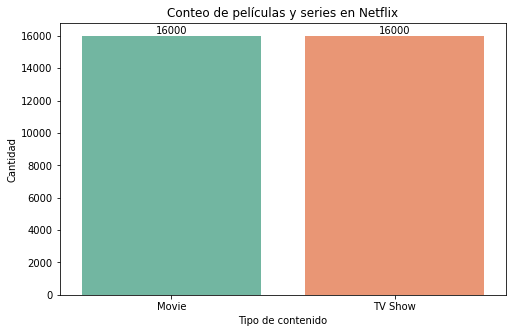

In [11]:
## Gráfica de barras con etiquetas
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x='type', data=netflix_dataset, palette='Set2')
plt.title('Conteo de películas y series en Netflix')
plt.xlabel('Tipo de contenido')
plt.ylabel('Cantidad')
plt.bar_label(plt.gca().containers[0])
plt.show()

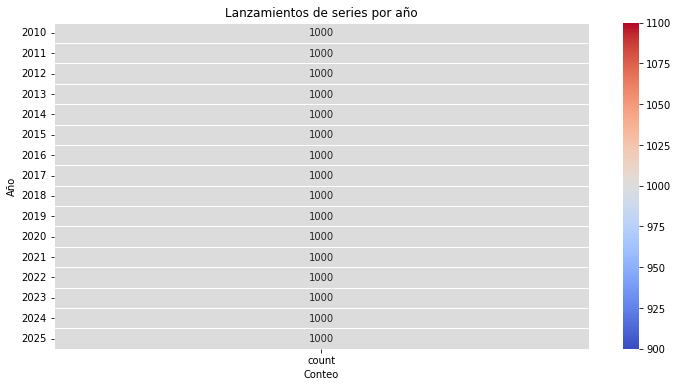

In [12]:
## Mapa de calor de lanzamientos por año de series
plt.figure(figsize=(12,6))
heatmap_data = netflix_dataset[netflix_dataset['type'] == 'TV Show'] \
    .groupby(['release_year']).size().reset_index(name='count')
heatmap_data = heatmap_data.pivot_table(index='release_year', values='count', aggfunc='sum')

sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm', linewidths=1)
plt.title('Lanzamientos de series por año')
plt.xlabel('Conteo')
plt.ylabel('Año')
plt.show()

In [13]:
# Nuevo dataset
rating_dataset = netflix_dataset[['title', 'vote_average', 'country']]
rating_dataset = rating_dataset.dropna(subset=['vote_average'])  # Eliminar nulos
rating_dataset = rating_dataset.sort_values(by='vote_average', ascending=False)

In [14]:
# 10 mejores
top10_rated = rating_dataset.head(10)

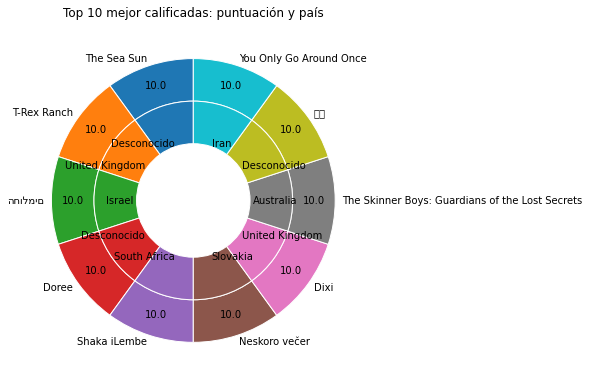

In [15]:
# Gráfica de pastel
import matplotlib.pyplot as plt

# Asegúrate de que dict no esté sobrescrito
try:
    del dict
except:
    pass

# Preparar datos
labels_outer = top10_rated['title']
sizes_outer = top10_rated['vote_average']
labels_inner = top10_rated['country'].fillna('Desconocido')

# Crear figura
fig, ax = plt.subplots(figsize=(8, 8))

# Capa exterior: puntuaciones
wedges_outer, texts_outer, autotexts_outer = ax.pie(
    sizes_outer,
    radius=1,
    labels=labels_outer,
    labeldistance=1.05,
    autopct='%1.1f',
    startangle=90,
    pctdistance=0.85,
    wedgeprops={"width": 0.3, "edgecolor": "white"},
    textprops={"color": "black"}
)

# Capa interior: países
wedges_inner, texts_inner = ax.pie(
    [1] * len(labels_inner),
    radius=0.7,
    labels=labels_inner,
    labeldistance=0.6,
    startangle=90,
    wedgeprops={"width": 0.3, "edgecolor": "white"},
    textprops={"color": "black"}
)

ax.set(aspect="equal", title='Top 10 mejor calificadas: puntuación y país')
plt.tight_layout()
plt.show()

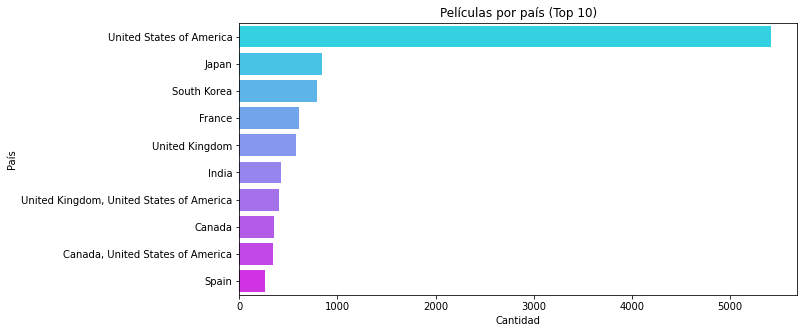

In [16]:
# Gráficos totales
movies = netflix_dataset[netflix_dataset['type'] == 'Movie']
top_countries = movies['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='cool')
plt.title('Películas por país (Top 10)')
plt.xlabel('Cantidad')
plt.ylabel('País')
plt.show()

In [17]:
rating_dataset = netflix_dataset[['title', 'vote_average', 'country']].dropna(subset=['vote_average'])
rating_dataset = rating_dataset.sort_values(by='vote_average', ascending=False)

In [18]:
country_counts = netflix_dataset['country'].value_counts().head(11)
print(country_counts)

United States of America                    7760
Japan                                       2587
China                                       2004
South Korea                                 1999
United Kingdom                              1106
France                                       855
India                                        771
Canada                                       738
Germany                                      554
United Kingdom, United States of America     513
Philippines                                  510
Name: country, dtype: int64


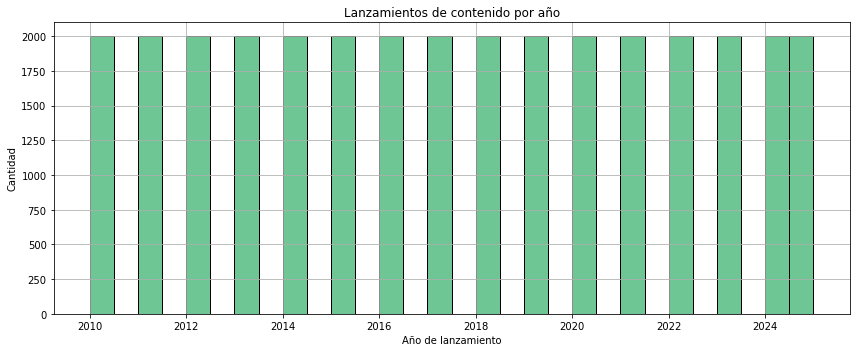

In [19]:
plt.figure(figsize=(12,5))
sns.histplot(netflix_dataset['release_year'], bins=30, kde=False, color='mediumseagreen')
plt.title('Lanzamientos de contenido por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad')
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
tv_shows = netflix_dataset[netflix_dataset['type'] == 'TV Show'].copy()

# Extraer número de temporadas
tv_shows['seasons'] = tv_shows['duration'].str.extract(r'(\d+)').astype(float)

# Agrupar por título y temporadas
top_seasons = tv_shows.sort_values(by='seasons', ascending=False).head(20)

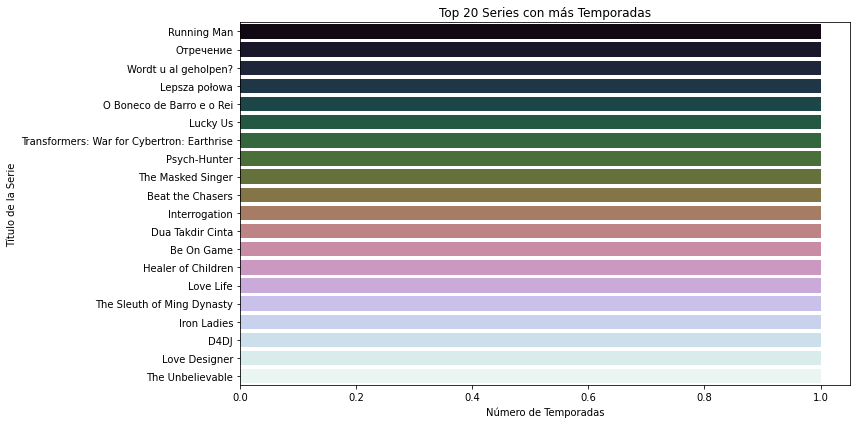

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(y=top_seasons['title'], x=top_seasons['seasons'], palette='cubehelix')
plt.title('Top 20 Series con más Temporadas')
plt.xlabel('Número de Temporadas')
plt.ylabel('Título de la Serie')
plt.tight_layout()
plt.show()

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
# Llenar nulos
netflix_dataset['description'] = netflix_dataset['description'].fillna('')

# Inicializar y aplicar TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(netflix_dataset['description'])

# Mostrar forma del resultado
print(tfidf_matrix.shape)  # filas = contenidos, columnas = palabras únicas

(32000, 54565)


In [26]:
from sklearn.metrics.pairwise import linear_kernel

# Calcular similitud coseno
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Indices por título
indices = pd.Series(netflix_dataset.index, index=netflix_dataset['title']).drop_duplicates()

# Función de recomendación
def recommend(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return netflix_dataset['title'].iloc[movie_indices]
